Data pro-processing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_name = 'forestfires.csv'
df = pd.read_csv(file_name)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
print(len(df))

517


Transform the nominal variables (month and day)

In [4]:
for i in range(len(df)):
    if df["month"][i] == "jan":
        df["month"][i] = 1
    if df["month"][i] == "feb":
        df["month"][i] = 2
    if df["month"][i] == "mar":
        df["month"][i] = 3
    if df["month"][i] == "apr":
        df["month"][i] = 4
    if df["month"][i] == "may":
        df["month"][i] = 5
    if df["month"][i] == "jun":
        df["month"][i] = 6
    if df["month"][i] == "jul":
        df["month"][i] = 7
    if df["month"][i] == "aug":
        df["month"][i] = 8
    if df["month"][i] == "sep":
        df["month"][i] = 9
    if df["month"][i] == "oct":
        df["month"][i] = 10
    if df["month"][i] == "nov":
        df["month"][i] = 11
    if df["month"][i] == "dec":
        df["month"][i] = 12
        
    if df["day"][i] == "mon":
        df["day"][i] = 1 
    if df["day"][i] == "tue":
        df["day"][i] = 2
    if df["day"][i] == "wed":
        df["day"][i] = 3
    if df["day"][i] == "thu":
        df["day"][i] = 4
    if df["day"][i] == "fri":
        df["day"][i] = 5
    if df["day"][i] == "sat":
        df["day"][i] = 6
    if df["day"][i] == "sun":
        df["day"][i] = 7

c:\users\50221\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\50221\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\50221\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c

In [5]:
df[["month","day"]] = df[["month","day"]].astype("int64")

In [6]:
df.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [7]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


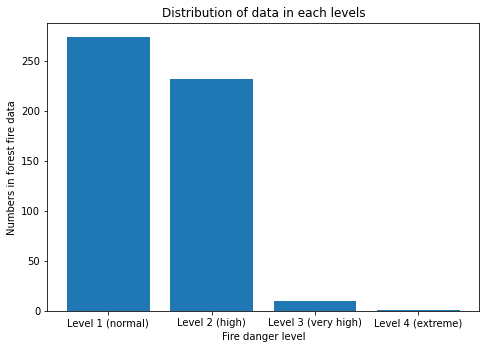

In [11]:
cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0

for i in range(len(df)):
    if df["area"][i] < 1:
        cont1 += 1
    if 1 <= df["area"][i] and df["area"][i] < 100:
        cont2 += 1
    if 100 <= df["area"][i] and df["area"][i] < 1000:
        cont3 += 1
    if 1000 <= df["area"][i]:
        cont4 += 1
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
level = ['Level 1 (normal)', 'Level 2 (high)', 'Level 3 (very high)', 'Level 4 (extreme)']
num = [cont1,cont2,cont3,cont4]
ax.set_ylabel('Numbers in forest fire data')
ax.set_xlabel('Fire danger level')
ax.set_title("Distribution of data in each levels")
ax.bar(level,num)
plt.show()

In [9]:
cont1

274

Based on the pubilc forest fire report, the forest fire danger is usually rated normal,high, very high or extreme. Thus we can assign 3 levels for the burned forest areas. Level 1 is normal forest fire danger rank, which means burned area is under 1 hectare. Level 2 is high forest fire danger rank, which means burned area is greater than 1 hectare but lower than 100 hectare, and Level 3 is very high (extreme) forest fire danger rank, which means burned area is greater than 100 hectare. But based on our dataset, the data of very high case is pretty small, so we just assign two labels here.     

In [107]:
# assign labels to burned area
df.loc[df["area"] < 1 , "area"] = -1
df.loc[df['area'] >= 1 , "area"] = 1

In [111]:
# # save the data
# df.to_csv('new_ff.csv', index=False)

In [112]:
print(len(df.loc[df["area"] == 1]))
print(len(df.loc[df["area"] == -1]))

243
274


Then we need assign split our data into two part, 70% data to training and 30% to testing. 

Split the training and testing data

In [129]:
# Since the original data is ordered by time, so we need shuffle the order first.
new_data = df.sample(frac=1).reset_index(drop=True)

In [130]:
new_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,6,6,7,1,94.2,62.3,442.9,11.0,23.0,36,3.1,0.0,-1.0
1,7,4,9,5,92.4,117.9,668.0,12.2,19.0,34,5.8,0.0,1.0
2,3,4,2,3,86.9,6.6,18.7,3.2,8.8,35,3.1,0.0,1.0
3,6,5,5,6,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,-1.0
4,2,2,9,5,92.4,117.9,668.0,12.2,19.6,33,5.4,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,6,5,9,5,92.4,117.9,668.0,12.2,19.6,33,6.3,0.0,1.0
513,6,3,2,5,84.1,7.3,52.8,2.7,14.7,42,2.7,0.0,-1.0
514,6,3,9,4,92.8,119.0,783.5,7.5,18.9,34,7.2,0.0,1.0
515,7,5,9,2,91.0,129.5,692.6,7.0,20.7,37,2.2,0.0,1.0


In [138]:
label = new_data["area"]

new_data = new_data.drop(columns=['area'])

In [139]:
training_data = new_data[:362]
testing_data = new_data[362:]
training_label = label[:362]
testing_label = label[362:]

In [140]:
training_data.to_csv('training_data.csv', index=False)
testing_data.to_csv('testing_data.csv', index=False)

training_label.to_csv('training_label.csv', index=False)
testing_label.to_csv('testing_label.csv', index=False)